In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images to be fed into the ANN
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(256, activation='relu'), # Adjusted input shape
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit)
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(train_images, train_labels, epochs=12, batch_size=32, validation_split=0.2)
model.save("/content/drive/MyDrive/Mnist Digit Recogination/ANN-Model.h5")

Epoch 1/12
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2285 - accuracy: 0.9323 - val_loss: 0.1200 - val_accuracy: 0.9636
Epoch 2/12
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0941 - accuracy: 0.9714 - val_loss: 0.1094 - val_accuracy: 0.9668
Epoch 3/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0623 - accuracy: 0.9801 - val_loss: 0.0942 - val_accuracy: 0.9720
Epoch 4/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0906 - val_accuracy: 0.9738
Epoch 5/12
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.1082 - val_accuracy: 0.9703
Epoch 6/12
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.0931 - val_accuracy: 0.9758
Epoch 7/12
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0989 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9778
Test accuracy: 97.78%


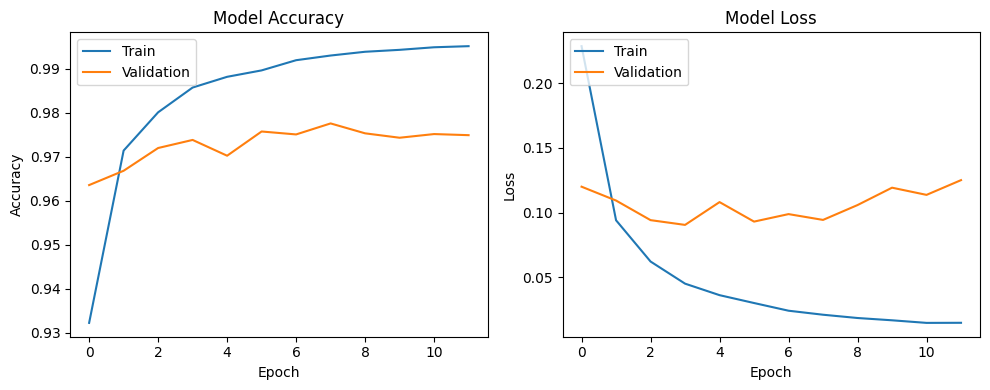

In [6]:
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Mnist Digit Recogination/ANN-Accuracy-Loss-plots.svg",format="svg")
plt.tight_layout()
plt.show()

In [7]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [8]:
cm = confusion_matrix(test_labels, predicted_labels)

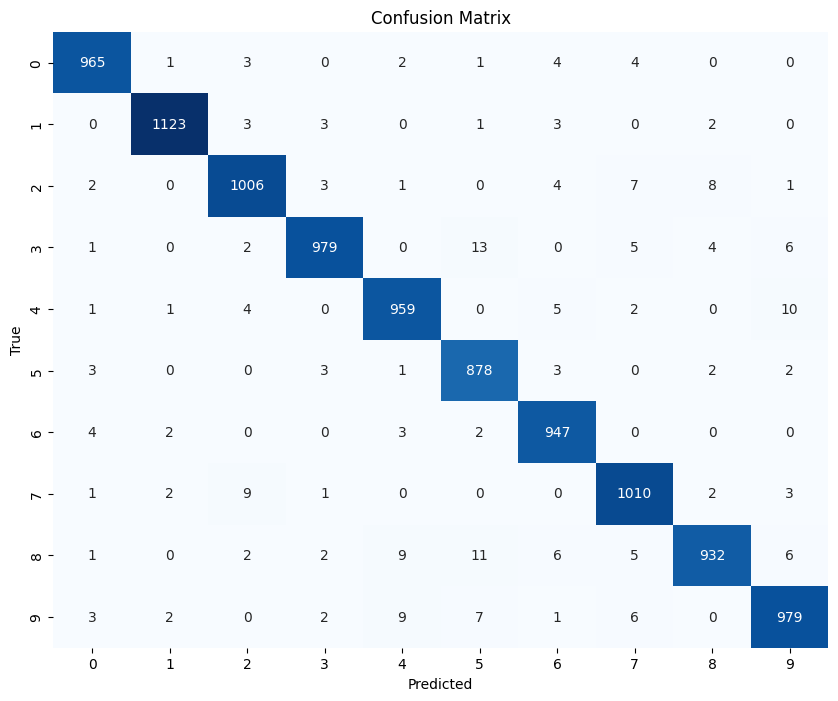

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
plt.savefig("/content/drive/MyDrive/Mnist Digit Recogination/ANN-cm.svg",format="svg")